{(-10/3, 0), (0, 0), (5, -5*sqrt(5)*I), (5, 5*sqrt(5)*I)}


C:\Users\esultano\AppData\Local\Temp/ipykernel_11392/1269352575.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ctrs_backend.fig.show()


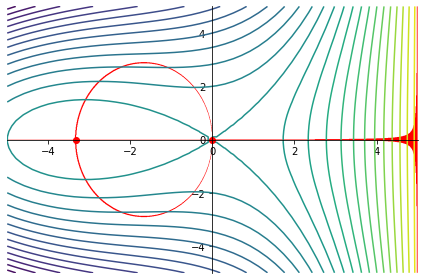

In [41]:
from sympy.plotting.plot import Plot, ContourSeries, MatplotlibBackend
from sympy import plot_implicit, diff
from sympy.solvers.solveset import nonlinsolve
from sympy.abc import x, y

class MyContourSeries(ContourSeries):

    def __init__(self, expr, var_start_end_x, var_start_end_y, **kwargs):
        super(MyContourSeries, self).__init__(expr, var_start_end_x, var_start_end_y)
        self.nb_of_points_x = kwargs.get('nb_of_points_x', 50)
        self.nb_of_points_y = kwargs.get('nb_of_points_y', 50)
        self.levels = kwargs.get('levels', 5)

    def get_meshes(self):
        mesh_x, mesh_y, f = super().get_meshes()
        return (mesh_x, mesh_y, f, self.levels)

x_min = -5
x_max = 5
y_min = -5
y_max = 5
f = x**3 + 5*x**2 + x*y**2 - 5*y**2

f_x = diff(f,x)
f_y = diff(f,y)

ctrs_plot = Plot(
    MyContourSeries(f, (x,x_min,x_max), (y,y_min,y_max),
                      nb_of_points_x=50, nb_of_points_y=50, levels=30)
)
ctrs_plot.extend(plot_implicit(f_x, line_color='red', show=False))
ctrs_plot.extend(plot_implicit(f_y, line_color='red', show=False))

critical_points = nonlinsolve([f_x, f_y], [x, y])
print(critical_points)
x_arr = [0,-10/3]
y_arr = [0,0]

ctrs_backend = MatplotlibBackend(ctrs_plot)
ctrs_backend.process_series()
ctrs_backend.fig.tight_layout()
ctrs_backend.ax[0].plot(x_arr, y_arr, "o", color='red')
ctrs_backend.fig.show()
#ctrs_plot.show()